In [ ]:
!pip install bs4

In [ ]:
import requests
from bs4 import BeautifulSoup as bs

In [ ]:
response = requests.get('https://pythondojang.bitbucket.io/weather/observation/currentweather.html') # 목적지 URL의 HTML을 가져옴
bs = bs(response.content, 'html.parser') #  bs4로 TEXT형태의 HTML을 파싱하여 객체 타입으로 변환

In [ ]:
table = bs.find('table', {'class':'table_develop3'}) #  css attribute가  'table_develop3'인 table을 찾는다

In [ ]:
type(table)

In [ ]:
data = []
for tr in table.find_all('tr'): # 모든 tr을 찾아 반복
    tds = list(tr.find_all('td'))  # 각 tr 중 모든  td를 모아 list타입으로 변환
    for td in tds:
        if td.find('a'):
#             point = td.find('a').text
            point = tds[0].text
            temperature = tds[5].text
            humidity = tds[9].text
            data.append([point, temperature, humidity])

In [ ]:
data[:10]

In [ ]:
with open('weather.csv', 'w') as file :
    file.write('point, temperature, humidity\n')
    for i in data:
        file.write('{0}, {1}, {2}\n'.format(i[0], i[1], i[2])) 

In [ ]:
!pip install numpy==1.19.3

In [99]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [100]:
df  = pd.read_csv('weather.csv', index_col= 'point',  encoding= 'euc-kr')

In [101]:
type(df.loc['서울'])

pandas.core.series.Series

In [102]:
df = df.loc[['서울', '인천', '대전', '대구', '광주', '부산', '울산']]

In [103]:
df

,temperature,humidity
point,,
서울,25.6,30
인천,20.8,54
대전,25.1,37
대구,25.7,31
광주,24.0,35
부산,20.2,66
울산,19.7,70


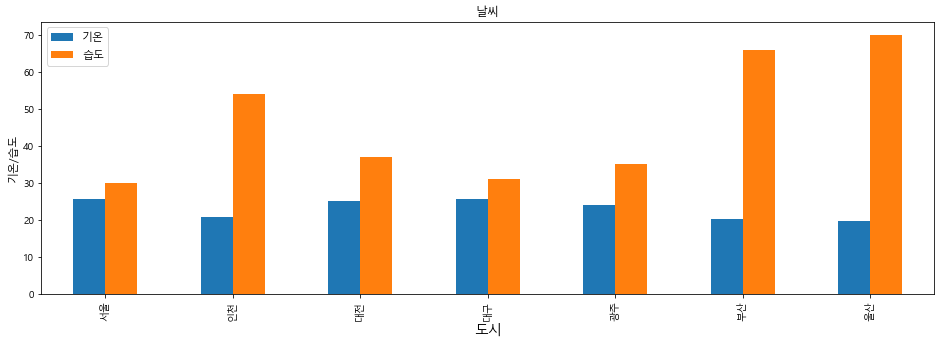

In [105]:
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

ax = df.plot(kind='bar', title='날씨', figsize=(16, 5), legend=True, fontsize=10)
ax.set_xlabel('도시', fontsize=14)
ax.set_ylabel('기온/습도', fontsize=11)
ax.legend(['기온', '습도'], fontsize=11)

In [108]:
!git push origin master

error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/JungGi-Lee/crolling.git'
